# Vectors embeddings
Vector embeddings are a way to represent nonnumerical data like words and images as an array of numbers so that machine learning models can process them.  

since vectors could be any number of features, it gets harder and hardt to plot them, however if you were to plot the data, similar data should be close togother. 

The number of elements in the vector corispond to the number of features in the data, or the columns. We call the number of elements the dementionality of the vector. 




In [1]:
!pip install matplotlib scipy

  Using cached matplotlib-3.10.8-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (52 kB)
  Using cached scipy-1.15.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.3 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pillow-12.1.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached matplotlib-3.10.8-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached scipy-1.1

In [3]:
import numpy as np
# Weather Embeddings
# x : wind intensity
# y : precipitation
# x : storm severity
breeze = np.array([1, 3, 2])
rain   = np.array([5, 5, 5])
cloud  = np.array([2, 2, 2])

storm = breeze + rain
hurricane = storm + breeze

print("storm:", storm)
print("hurricane:", hurricane)


storm: [6 8 7]
hurricane: [ 7 11  9]


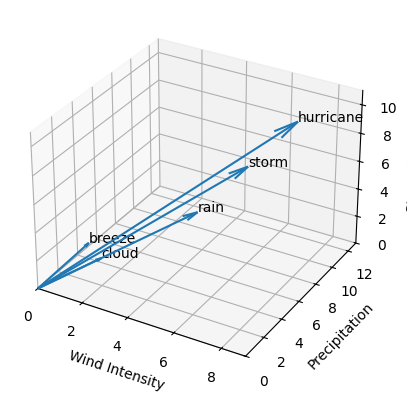

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # enables 3D

def plot_weather_vectors(vectors, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Draw arrows from origin
    for v, label in zip(vectors, labels):
        ax.quiver(0, 0, 0, v[0], v[1], v[2], arrow_length_ratio=0.08)
        ax.text(v[0], v[1], v[2], label)

    ax.set_xlabel("Wind Intensity")
    ax.set_ylabel("Precipitation")
    ax.set_zlabel("Storm Severity")

    # Set nice limits
    all_vals = np.vstack(vectors)
    ax.set_xlim(0, all_vals[:,0].max()+2)
    ax.set_ylim(0, all_vals[:,1].max()+2)
    ax.set_zlim(0, all_vals[:,2].max()+2)

    plt.show()

plot_weather_vectors(
    vectors=[breeze, rain, cloud, storm, hurricane],
    labels=["breeze", "rain", "cloud", "storm", "hurricane"]
)

# Your Trun: Vectors
### Activity
1. Pick something real:
   - a wildfire
   - a song
   - a student schedule
   - a game character

2. Choose 3 measurable features (things you could record as numbers):
   - Wildfire → [acres burned, homes threatened, containment %]
   - Song → [tempo, length, popularity]
   - Student → [classes, credits, study hours]
   - Character → [health, strength, speed]

3. Assign realistic numbers to those features.
  Ex:
   
   Song A: fast pop song
    - tempo = 120 BPM //This is fast so it's tempo is fast
    - length = 210 seconds
    - popularity = 85

    vector_A = [120, 210, 85]

    Song B: slow acoustic song
    - tempo = 70 BPM //Slow is fast so it's tempo is fast
    - length = 180 seconds
    - popularity = 40

    vector_B = [70, 180, 40]

4. Create your vector:
   my_vector = np.array([feature1, feature2, feature3])

5. In one sentence, explain what each number represents.



# Vector Magnitude

Because vectors can represent physical or abstract quantities, they have both **direction** and **magnitude**.  
Finding the magnitude helps us understand how data points relate to each other in space.

Magnitude is useful because it allows us to:
- Normalize vectors so we can compare direction instead of size
- Reduce the impact of outliers
- Scale vectors so one feature does not dominate the others

**Direction** describes where the vector is pointing.  
**Magnitude** represents the length of the vector (and is always a positive scalar).

Depending on how many features a vector has, the magnitude formula will change slightly, but the structure is always the same. Below is the formula for a vector in 3D space.

> Note: You will not have to compute this by hand in practice. Python will handle the math for us, but it is important to understand what is happening conceptually. The symbol ‖v‖ represents the **magnitude** of a vector. This formula shows how that magnitude is calculated.

- \(x^2, y^2, z^2\) are the squared components of a 3-dimensional vector.
- These squared values are added together.
- The **√** symbol means we take the square root of that sum.


![Vector magnitude formula](images/vector_formula.png)

---

## How to Compute Vector Magnitude

1. Identify the x, y, and z components of the vector.  
2. Square each component.  
3. Add the squared values together.  
4. Take the square root of the sum.

That result is the **magnitude** (length) of the vector.


In [ ]:
# Built in funciton np.linalg.norm
storm_mag_np = np.linalg.norm(storm)
print("Storm magnitude (NumPy):", storm_mag_np)

# What's happening
def vector_magnitude(v):
    return np.sqrt(np.sum(v * v))

# v * v squares every feature in the vector
# np.sum adds all of the squared values together
# np.sqrt finds the square root of that sum


storm_mag= vector_magnitude(storm)
print("Storm magnitude:", storm_mag)


Storm magnitude (NumPy): 12.206555615733702
Storm magnitude: 12.206555615733702


# Your Turn: Compute Vector Magnitude 
Compute Vector Magnitude using the vectors you created in the last activity.


# Unit Vector 
Unit vectors are vectors that have a magnitude of 1. This lets us isolate the direction from the magnitude which can be used to help ML models process the data better.
The top V is the original vector the ||v|| is the magnitude the v with the carrot represents unit vector.  Its saying devide the orginal vector by the magnituded to get the unit vector.
![Unit Vector Formula](images/unit_vector.png)


In [9]:
def create_unit_vector(np_vector):
    mag = vector_magnitude(np_vector)
    return np_vector / mag

print("Storm Unit Vector", create_unit_vector(storm))

Storm Unit Vector [0.49153915 0.65538554 0.57346234]


# Your Turn: Unit Vector
Find the Unitvector for one of your vectors 

# Dot Product of Two Vectors
A dot product is an operation between two vectors that returns a single scalar value.

Dot products are used in many areas of machine learning. One of the most important uses is in computing weighted inputs inside machine learning and deep learning models.

In a neural network, which is a network of nodes, each node takes in several inputs and multiplies them by weights. The dot product is what combines those inputs and weights into a single value that the model can use to make a prediction
- **a** is the first vector  
- **b** is the second vector  
- The dot (·) means they are being combined using the dot product operation  
- The sideways M (Σ) means the sum of all components  
- **aᵢ · bᵢ** means multiply the matching values from each vector


![dot product Formula](images/dot_product.png)


In [ ]:
def dot_product_loop(a, b):
    if len(a) != len(b):
        raise ValueError("Vectors must be the same length")

    total = 0
    for i in range(len(a)):
        total += a[i] * b[i]

    return total

# In numpy
def dot_product_numpy(a, b):
    return np.sum(a * b)

# Your Turn: Dot Product
Find the Dot Product of two of your vectors

# Using Dot Predictions
[Linear regression  ](https://www.geeksforgeeks.org/machine-learning/ml-linear-regression/)


![Simple linear regression](images/simple_linear_regression.png)
- **ŷ** is the predicted value  
- **x** is the input (independent variable)  
- **θ₀** is the intercept (the value of ŷ when x = 0)  
- **θ₁** is the slope or coefficient (how much ŷ changes for one unit of x)

![multiple linear regression](images/multiple_linear_regression.png)
- **ŷ** is the predicted value  
- **x₁, x₂, …, xₙ** are the independent variables  
- **θ₁, θ₂, …, θₙ** are the coefficients (weights) for each predictor  
- **θ₀** is the intercept


In [12]:
# Predicting Flood Severity with Linear Regression
# [Rainfall(mm), River hight(m)]
# Model severity = 0.45 * rainfall + 2.1 * river height + 1.8
# 0.45 and 2.1 are exsisting weights from training the model (not shown) and 1.8

# Flood data
flood_1_array = np.array([120, 4.2])   # rainfall, river height
flood_1_actual = 62.0

flood_2_array = np.array([80, 3.1])
flood_2_actual = 41.5

# weights and bias from the model
weights = np.array([0.45, 2.1])


def predict_severity(flood_vector):
    return np.sum(flood_vector * weights)

def prediction_error(predicted, actual):
    return abs(predicted - actual)

# Flood 1
pred_1 = predict_severity(flood_1_array)
err_1 = prediction_error(pred_1, flood_1_actual)

# Flood 2
pred_2 = predict_severity(flood_2_array)
err_2 = prediction_error(pred_2, flood_2_actual)

print("Flood 1 predicted severity:", pred_1)
print("Flood 1 actual severity:   ", flood_1_actual)
print("Flood 1 error:             ", err_1)

print("\nFlood 2 predicted severity:", pred_2)
print("Flood 2 actual severity:   ", flood_2_actual)
print("Flood 2 error:             ", err_2)

Flood 1 predicted severity: 62.82
Flood 1 actual severity:    62.0
Flood 1 error:              0.8200000000000003

Flood 2 predicted severity: 42.51
Flood 2 actual severity:    41.5
Flood 2 error:              1.009999999999998


# Your Turn: Linear Regression Example:

Use Linear Regresson to predict the price of a Pokémon card using two features.

### Model

ŷ = w1 * x1 + w2 * x2

Where:
- x1 = Rarity score (1 = common, 5 = ultra rare)
- x2 = Condition score (1 = damaged, 10 = mint)

### Weights

w = [8, 3]

### Feature Vectors

| Card        | Rarity (x1) | Condition (x2) | Vector |
|-------------|------------|---------------|--------|
| Pikachu     | 1          | 4             | [1, 4] |
| Eevee       | 2          | 7             | [2, 7] |
| Gengar      | 4          | 9             | [4, 9] |
| Charizard   | 5          | 10            | [5, 10] |
| Mewtwo      | 4          | 2             | [4, 2] |

### Predicted Prices


| Card      | Calculation           | Price |
|-----------|------------------------|--------|
| Pikachu   | 8(1) + 3(4) = 20       | $20    |
| Eevee     | 16 + 21 = 37           | $37    |
| Gengar    | 32 + 27 = 59           | $59    |
| Charizard | 40 + 30 = 70           | $70    |
| Mewtwo    | 32 + 6 = 38            | $38    |


# Linear combinations, Baisis and subspaces 
Datasets often grow together, which means it follows a pattern and exsists on a lower-demsional shpae, we can use linear combinations and bias vectors to describe that shape

## Wildfire Features

| Burned Acres | Evacuations |
|--------------|-------------|
| 100 | 10 |
| 200 | 20 |
| 300 | 30 |
| 400 | 40 |

These features grow together, as the fire spreads, evacuations rise 


In [ ]:
fire_small  = np.array([100, 10])
fire_medium = np.array([200, 20])
fire_large  = np.array([300, 30])

#We can evenly scale this up
basis = [100, 10]
scalars = np.array([1, 2, 3, 4])
points = scalars.reshape(-1, 1) * basis
print(points)



[[100  10]
 [200  20]
 [300  30]
 [400  40]]
